In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import warnings
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")

In [2]:
df1 = pd.read_csv('data/van_xuoi.csv')
df2 = pd.read_csv('data/phi_hu_cau_va_binh_chon_nhieu_nhat.csv')
df3 = pd.read_csv('data/bo_sung.csv')
df4 = pd.read_csv('data/bo_sung_1.csv')
df5 = pd.read_csv('data/crawling_tiki.csv')

In [3]:
df3 = df3.loc[df3.rating < 4]
df4 = df4.loc[df4.rating < 4]

In [4]:
data = pd.concat([df1, df2, df3, df4, df5])
data.head()

,Unnamed: 0,text,rating
0,0,[Có thể đòi hỏi gì thêm ở Dế mèn phiêu lưu ký ...,5
1,1,"Dế Mèn Phiêu Lưu Ký, nó giống như Chúa Nhẫn vậ...",5
2,2,bạn nào rate thấp cho cuốn này thì có lẽ là do...,5
3,3,Ghét cái cuốn này. Ghét cay ghét đắng. Nhưng m...,1
4,4,Dế Mèn đúng là hình ảnh của các bé trai tuổi 6...,0


In [5]:
data = data.reset_index()
data = data.drop(columns = ['index', 'Unnamed: 0'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11142 non-null  object
 1   rating  11142 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 174.2+ KB


In [7]:
data.shape

(11142, 2)

In [8]:
data = data.drop_duplicates()
data.shape

(9594, 2)

In [9]:
data = data.reset_index()
data = data.drop(columns = ['index'])

In [10]:
data = data.loc[data['text'] != 'This review has been hidden because it contains spoilers. To view it, click here.']

In [11]:
data = data.reset_index()
data = data.drop(columns = ['index'])
data.shape

(9588, 2)

In [12]:
data = data.loc[data['rating'] != 0]
data = data.reset_index()
data = data.drop(columns = ['index'])
data.shape

(9208, 2)

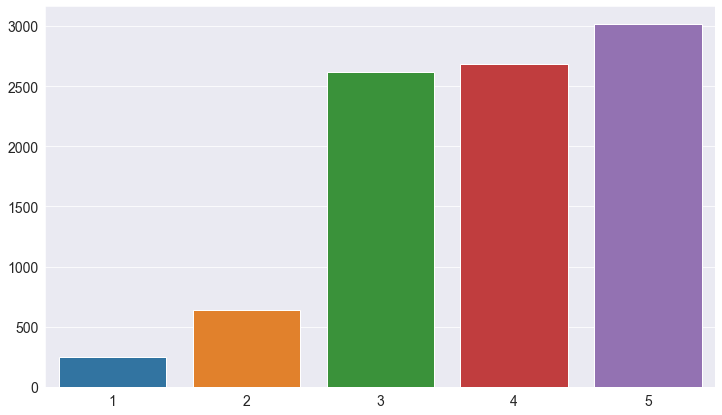

In [13]:
plt.figure(figsize = (12,7))
sb.barplot(x = data.rating.value_counts().index, y = data.rating.value_counts().values)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

**Nhận xét**:
 - Nhìn vào biểu đồ có thể thấy số lượng bình luận từ 3 đến 5 sao chiếm đa số. Tuy nhiên số lượng bình luận 1 và 2 sao thì rất ít dẫn đến việc mất cân bằng dữ liệu

In [14]:
def evaluate(x,y):
    for i in range(len(data.rating)):
        if x[i] == 4 or x[i] == 5:
            y[i] = 'tích cực'
        elif data.rating[i] == 3:
            y[i] = 'trung tính'
        else:
            y[i] = 'tiêu cực'
    return y

In [15]:
data.evaluate = ' '
data = data.assign(evaluate = ' ')
data.evaluate = evaluate(data.rating, data.evaluate)
data.head()

,text,rating,evaluate
0,[Có thể đòi hỏi gì thêm ở Dế mèn phiêu lưu ký ...,5,tích cực
1,"Dế Mèn Phiêu Lưu Ký, nó giống như Chúa Nhẫn vậ...",5,tích cực
2,bạn nào rate thấp cho cuốn này thì có lẽ là do...,5,tích cực
3,Ghét cái cuốn này. Ghét cay ghét đắng. Nhưng m...,1,tiêu cực
4,Đọc lại hai lần vẫn thích và ấn tượng nhất đoạ...,4,tích cực


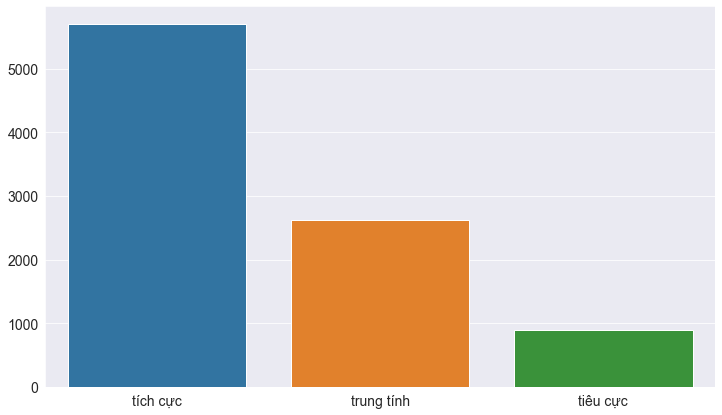

In [16]:
plt.figure(figsize = (12,7))
sb.barplot(x = data.evaluate.value_counts().index, y = data.evaluate.value_counts().values)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

**Nhận xét**:
 - Tích cực chiếm số lượng nhiều nhất với trên 5000 lượt đánh giá
 - Tiêu cực chiếm số lượng ít nhất với chỉ khoảng 900 lượt đánh giá, với số lượng đánh giá tiêu cực ít như vậy có thể sẽ phải sử dụng oversampling

In [17]:
from langdetect import detect

In [18]:
data['detect_lang'] = ' '
data = data.assign(detect_lang = ' ')
for i in range(data.shape[0]):
    try:
        data['detect_lang'][i] = detect(data.text[i])
    except:
        continue

In [19]:
# Comments bằng tiếng Anh
data_en = data.loc[data.detect_lang == 'en']
data_en.shape

(1582, 4)

In [20]:
# Comments bằng tiếng Việt
data_vn = data.loc[data.detect_lang == 'vi']
data_vn = data_vn.reset_index()
data_vn = data_vn.drop(columns = ['index'])
data_vn.shape

(7448, 4)

In [21]:
data_vn.head()

,text,rating,evaluate,detect_lang
0,[Có thể đòi hỏi gì thêm ở Dế mèn phiêu lưu ký ...,5,tích cực,vi
1,"Dế Mèn Phiêu Lưu Ký, nó giống như Chúa Nhẫn vậ...",5,tích cực,vi
2,bạn nào rate thấp cho cuốn này thì có lẽ là do...,5,tích cực,vi
3,Ghét cái cuốn này. Ghét cay ghét đắng. Nhưng m...,1,tiêu cực,vi
4,Đọc lại hai lần vẫn thích và ấn tượng nhất đoạ...,4,tích cực,vi


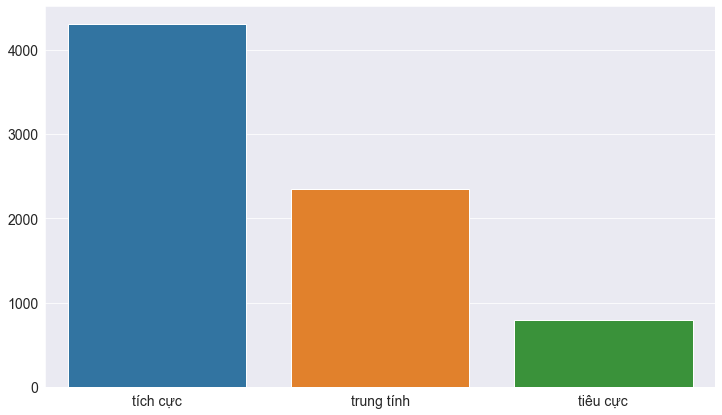

In [22]:
plt.figure(figsize = (12,7))
sb.barplot(x = data_vn.evaluate.value_counts().index, y = data_vn.evaluate.value_counts().values)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

**Nhận xét**
- Số bình luận tích cực của phần dữ liệu tiếng Việt chiếm nhiều nhất, gấp đôi số bình luận trung tính. Còn bình luận tiêu cực là ít nhất

In [23]:
## data_vn.to_excel("gán_lại_nhãn.xlsx")

In [24]:
data_vn = pd.read_excel('gán_lại_nhãn.xlsx',index_col = 0).reset_index().drop(columns= ['index'])
data_vn.shape[0]

7426

<span style = 'color : red; font-size :35px'>**Xử lý text**</span>

In [25]:
from underthesea import word_tokenize, pos_tag, sent_tokenize # sent_tokenize tách ra từ 1 văn bản thành nhiều câu
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string

In [26]:
##LOAD EMOJICON
file = open('data/Cung cap HV/files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('data/Cung cap HV/files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('data/Cung cap HV/files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('data/Cung cap HV/files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('data/Cung cap HV/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [27]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+'  ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '                    
    document = new_sentence  
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [28]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [29]:
# có thể bổ sung thêm các từ: chẳng, chả...
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'không' in text_lst or 'hơi' in text_lst or 'khá' in text_lst or 'rất' in text_lst or 'đừng' in text_lst or 'dễ' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không' or  word == 'hơi' or word == ' khá ' or word == 'rất' or word == 'đừng' or word == 'dễ':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [30]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','V','VB','VY','R' , 'M', 'N', 'C']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [31]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [32]:
data_vn['text_clean'] = data_vn.text
def replace_word(text):
    text = text.apply(lambda x: x.lower().replace('(less)', ''))
    text = text.apply(lambda x: x.replace('cliche', 'rập khuôn'))
    text = text.apply(lambda x: x.replace('cute', 'dễ thương'))
    text = text.apply(lambda x: x.replace('underwhelming', 'không ấn tượng'))
    text = text.apply(lambda x: x.replace('dmplk', 'dế mèn phiêu lưu ký'))
    text = text.apply(lambda x: x.replace('trươca', 'trước'))
    text = text.apply(lambda x: x.replace('qđ', 'quyết định'))
    text = text.apply(lambda x: x.replace('goodread', ''))
    text = text.apply(lambda x: x.replace('đc', 'được'))
    text = text.apply(lambda x: x.replace('dếmèn', ''))
    text = text.apply(lambda x: x.replace('dếchoắt', ''))
    text = text.apply(lambda x: x.replace('dấu ấn rồng thiên', ''))
    text = text.apply(lambda x: x.replace('sgk', ''))
    text = text.apply(lambda x: x.replace('nbct', ''))
    text = text.apply(lambda x: x.replace('dragon ball', ''))
    text = text.apply(lambda x: x.replace('tri chi vi tri chi, bất tri vi bất tri, thị tri dã', ''))
    text = text.apply(lambda x: x.replace('ndc', ''))
    text = text.apply(lambda x: x.replace('choux', ''))
    text = text.apply(lambda x: x.replace('muôn kiếp nhân sinh', '').replace('mkns', ''))
    text = text.apply(lambda x: x.replace('hành trình về phương đông', '').replace('htvpđ', ''))
    text = text.apply(lambda x: x.replace('haizzz', ''))
    text = text.apply(lambda x: x.replace('nhéeee', ''))
    text = text.apply(lambda x: x.replace('nhée', ''))
    text = text.apply(lambda x: x.replace('nháa', ''))
    text = text.apply(lambda x: x.replace('fluential', ''))
    text = text.apply(lambda x: x.replace('havg', ''))
    text = text.apply(lambda x: x.replace('bủnet', ''))
    text = text.apply(lambda x: x.replace('chips', ''))
    text = text.apply(lambda x: x.replace('vũ trọng phụng', ''))
    text = text.apply(lambda x: x.replace('nam cao', ''))
    text = text.apply(lambda x: x.replace('lôi mễ', ''))
    text = text.apply(lambda x: x.replace('nguyễn duy cần', ''))
    text = text.apply(lambda x: x.replace('rosie nguyễn', ''))
    text = text.apply(lambda x: x.replace('roise nguyễn', ''))
    text = text.apply(lambda x: x.replace('trang hạ', ''))
    text = text.apply(lambda x: x.replace('anh khang', ''))
    text = text.apply(lambda x: x.replace('nguyễn ngọc thạch', ''))
    text = text.apply(lambda x: x.replace('vãn tình', ''))
    text = text.apply(lambda x: x.replace('trác nhã', ''))
    text = text.apply(lambda x: x.replace('midori', ''))
    text = text.apply(lambda x: x.replace('rosie', ''))
    text = text.apply(lambda x: x.replace('bok', ''))
    text = text.apply(lambda x: x.replace('lê hồng phong', ''))
    text = text.apply(lambda x: x.replace('lê văn nghĩa', ''))
    text = text.apply(lambda x: x.replace('việ ', 'việc'))
    text = text.apply(lambda x: x.replace('tìn ', ''))
    text = text.apply(lambda x: x.replace('thíc ', 'thích '))

    text = text.apply(lambda x: x.replace('ndung', 'nội dung'))
    text = text.apply(lambda x: x.replace('áp dung duoc', 'áp dụng được'))
    text = text.apply(lambda x: x.replace('thục tế', 'thực tế'))
    text = text.apply(lambda x: x.replace('phu hợp', 'phù hợp'))

    text = text.apply(lambda x: x.replace('qá', 'quá'))
    text = text.apply(lambda x: x.replace('nham chán', 'nhàm chán'))
    text = text.apply(lambda x: x.replace('hông', 'không'))
    text = text.apply(lambda x: x.replace('tkhông', 'thông'))
    text = text.apply(lambda x: x.replace('thuơg', 'thương'))
    text = text.apply(lambda x: x.replace('không búet', 'không biết'))
    text = text.apply(lambda x: x.replace('không biét', 'không biết'))
    text = text.apply(lambda x: x.replace('hok rõ', 'không rõ'))
    text = text.apply(lambda x: x.replace('thuwcstinhr', 'thức tỉnh'))
    text = text.apply(lambda x: x.replace('binô', ''))
    text = text.apply(lambda x: x.replace('bêtô', ''))
    text = text.apply(lambda x: x.replace('bêto', ''))
    text = text.apply(lambda x: x.replace('bvnsơn', ''))
    text = text.apply(lambda x: x.replace('zị', 'vậy'))
    text = text.apply(lambda x: x.replace('đỉm', 'điểm'))
    text = text.apply(lambda x: x.replace('tcn', ''))
    text = text.apply(lambda x: x.replace('nguyễn bính', ''))
    text = text.apply(lambda x: x.replace('xuân diệu', ''))
    text = text.apply(lambda x: x.replace('rùi', 'rồi'))
    text = text.apply(lambda x: x.replace('dễ thưn zữ z tr', 'dễ thương dữ vậy trời'))
    text = text.apply(lambda x: x.replace('chờy ơy pùn wa', 'trời ơi buồn quá'))
    text = text.apply(lambda x: x.replace('hok cóa', 'không có'))
    text = text.apply(lambda x: x.replace('nọy', ''))
    text = text.apply(lambda x: x.replace('nhín', ''))
    text = text.apply(lambda x: x.replace(' child ', ' '))
    text = text.apply(lambda x: x.replace('nguyễn huệ', ''))
    text = text.apply(lambda x: x.replace('nguyễn ánh', ''))
    
    text = text.apply(lambda x: x.replace('đx', 'đối xử'))
    text = text.apply(lambda x: x.replace(' k care', ' không quan tâm'))
    text = text.apply(lambda x: x.replace(' hông ', ' không '))
    text = text.apply(lambda x: x.replace(' hong ', ' không '))
    text = text.apply(lambda x: x.replace(' chả ', ' không '))
    text = text.apply(lambda x: x.replace(' chẳng ', ' không '))
    text = text.apply(lambda x: x.replace(' chưa ', ' không '))
    text = text.apply(lambda x: x.replace(' ko ', ' không '))
    text = text.apply(lambda x: x.replace(' k ', ' không '))
    text = text.apply(lambda x: x.replace(' khôg ', ' không '))
    text = text.apply(lambda x: x.replace(' khôgn ', ' không '))
    text = text.apply(lambda x: x.replace(' bth ', ' bình thường '))
    text = text.apply(lambda x: x.replace(' bthg ', ' bình thường '))

    text = text.apply(lambda x: x.replace('kh nhiều', 'không nhiều'))
    text = text.apply(lambda x: x.replace('kh liên quan', 'không liên quan'))
    text = text.apply(lambda x: x.replace('kh lấy được', 'không lấy được'))
    text = text.apply(lambda x: x.replace(' kp ', ' không phải '))

    text = text.apply(lambda x: x.replace(' nh ', ' '))
    text = text.apply(lambda x: x.replace('vềmột', 'về một'))
    text = text.apply(lambda x: x.replace('cũngđã', 'cũng đã'))
    text = text.apply(lambda x: x.replace('ồnbị', 'ồn bị'))                                                                                                
    text = text.apply(lambda x: x.replace('lđếnà', 'là')) 
    text = text.apply(lambda x: x.replace('nhưngnhà', ''))
    text = text.apply(lambda x: x.replace('buồ ', 'buồn '))
    text = text.apply(lambda x: x.replace('hậutuổithơ', ''))
    text = text.apply(lambda x: x.replace('cx', 'cũng'))
    text = text.apply(lambda x: x.replace('canhr', ''))
    text = text.apply(lambda x: x.replace('cỗ gắng', 'cố gắng'))
    

    text = text.apply(lambda x: x.replace('nguyễn văn mãi', ''))
    text = text.apply(lambda x: x.replace('trọng hứa', ''))
    text = text.apply(lambda x: x.replace('nghiêm bình', ''))
    text = text.apply(lambda x: x.replace('thằng đắc', ''))
    text = text.apply(lambda x: x.replace('tô sang', ''))
    text = text.apply(lambda x: x.replace('lão hiến', ''))
    text = text.apply(lambda x: x.replace('lão hiếng', ''))
    text = text.apply(lambda x: x.replace('trần đăng khoa', ''))
    text = text.apply(lambda x: x.replace('bê tô', ''))
    text = text.apply(lambda x: x.replace('chị ni', ''))
    text = text.apply(lambda x: x.replace('dế', ''))
    text = text.apply(lambda x: x.replace('dế mèn', ''))
    text = text.apply(lambda x: x.replace('dế choắt', ''))
    text = text.apply(lambda x: x.replace('xiến tóc', ''))
    text = text.apply(lambda x: x.replace('châu chấu voi', ''))
    text = text.apply(lambda x: x.replace('bọ ngựa', ''))
    text = text.apply(lambda x: x.replace('cào cào', ''))
    text = text.apply(lambda x: x.replace('chim trả', ''))
    text = text.apply(lambda x: x.replace('chị nhà trò', ''))
    text = text.apply(lambda x: x.replace('êmê', ''))
    text = text.apply(lambda x: x.replace(' mèn ', ''))
    text = text.apply(lambda x: x.replace(' trũi ', ''))
    text = text.apply(lambda x: x.replace('chí phèo', ''))
    text = text.apply(lambda x: x.replace('kông-hoa', ''))
    text = text.apply(lambda x: x.replace(' c ', ' '))
    text = text.apply(lambda x: x.replace(' g ', ' '))
    text = text.apply(lambda x: x.replace(' n ', ' '))
    text = text.apply(lambda x: x.replace(' h ', ' '))
    text = text.apply(lambda x: x.replace(' t ', ' '))
    text = text.apply(lambda x: x.replace(' r ', ' '))
    text = text.apply(lambda x: x.replace(' th ', ' '))
    text = text.apply(lambda x: x.replace(' ch ', ' '))

    text = text.apply(lambda x: x.replace('bằn', 'bằng'))
    text = text.apply(lambda x: x.replace('trắn ', 'trắng '))
    text = text.apply(lambda x: x.replace('quyể ', 'quyển '))

    
    text = text.apply(lambda x: x.replace('không recommend', 'không thích'))
    text = text.apply(lambda x: x.replace('không có gì', 'không'))
    text = text.apply(lambda x: x.replace('khong thich', 'không thích'))
    text = text.apply(lambda x: x.replace('khong biết', 'không biết'))
    text = text.apply(lambda x: x.replace('khong hieu', 'không hiểu'))
    text = text.apply(lambda x: x.replace('noi dung khong nhu mong doi', 'nội dung khônghay'))
    text = text.apply(lambda x: x.replace('khong hay', 'không_hay'))
    text = text.apply(lambda x: x.replace('khong thu vi', 'không thú vị'))
    text = text.apply(lambda x: x.replace('noi dung khong phu hop voi thuc tien', 'nội dung không phù hợp với thực tiễn'))

    # Loại bỏ bớt các từ dở xuất hiện trong bình luận tích cực
    text = text.apply(lambda x: x.replace('đọc dở', 'đọc giữa chừng'))
    text = text.apply(lambda x: x.replace('hâm dở', 'hâm'))
    text = text.apply(lambda x: x.replace('bỏ dở', 'bỏ giữa chừng'))
    
    # Xử lý một số từ ghép mà thư viện underthesea không ghép được

    text = text.apply(lambda x: x.replace('từng thích', 'từngthích'))
    text = text.apply(lambda x: x.replace('thấy thích', 'thấythích'))
    text = text.apply(lambda x: x.replace('chỉ nên', 'chỉnên'))
    text = text.apply(lambda x: x.replace('không hay', 'khônghay'))
    text = text.apply(lambda x: x.replace('khá hay', 'kháhay'))
    text = text.apply(lambda x: x.replace('quá hay', 'quáhay'))
    text = text.apply(lambda x: x.replace('hay quá', 'hayquá'))
    text = text.apply(lambda x: x.replace('cực hay', 'cựchay'))
    text = text.apply(lambda x: x.replace('hay cực', 'haycực'))
    text = text.apply(lambda x: x.replace('thấy hay', 'thấyhay'))
    text = text.apply(lambda x: x.replace('hay ghê', 'hayghê'))
    text = text.apply(lambda x: x.replace('rất hay', 'rấthay'))
    text = text.apply(lambda x: x.replace('hay lắm', 'haylắm'))
    text = text.apply(lambda x: x.replace('siêu hay', 'siêuhay'))
    text = text.apply(lambda x: x.replace(' highly recommend ', 'rấthay'))
    text = text.apply(lambda x: x.replace('highly recommended', 'rấthay'))
    text = text.apply(lambda x: x.replace('dở dang', 'dởdang'))
    text = text.apply(lambda x: x.replace('dang dở', 'dangdở'))
    text = text.apply(lambda x: x.replace('tuy nhiên', 'tuynhiên'))
    text = text.apply(lambda x: x.replace('tuy vậy', 'tuyvậy'))
    
    text = text.apply(lambda x: x.replace('đáng nể', 'đángnể'))
    # Chuyển các từ được viết kéo dài thành định dạng đúng. Ví dụ: nhaaaaa -> nha
    text = text.apply(lambda x: re.sub(r'([a-z])\1+', lambda y:y.group(1), x))
    
    return text

In [33]:
# Đọc file ten_tac_pham
file = open('data/ten_tac_pham.txt', 'r', encoding="utf8")
name_of_books = file.read().split('\n')
file.close()

In [34]:
# Thay tên tác phẩm bằng khoảng trắng
for name in name_of_books:
    for i in range(data_vn.shape[0]):
        if name in data_vn['text_clean'][i]:
            data_vn['text_clean'][i] = data_vn['text_clean'][i].replace(name, '')
        else:
            continue

In [35]:
# Đọc file ten_tac_gia
file = open('data/ten_tac_gia.txt', 'r', encoding="utf8")
name_of_authors = file.read().split('\n')
file.close()

In [36]:
# Thay tên tác giả bằng khoảng trắng
for name in name_of_authors:
    for i in range(data_vn.shape[0]):
        if name in data_vn['text_clean'][i]:
            data_vn['text_clean'][i] = data_vn['text_clean'][i].replace(name, '')
        else:
            continue

In [37]:
# Bỏ các url
for i in range(data_vn.shape[0]):
    if 'https://' in data_vn['text_clean'][i]:
        data_vn['text_clean'][i] = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', data_vn['text_clean'][i], flags=re.MULTILINE)   
    else:
        continue
        

for i in range(data_vn.shape[0]):
    if 'http://' in data_vn['text_clean'][i]:
        data_vn['text_clean'][i] = re.sub('http://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', data_vn['text_clean'][i], flags=re.MULTILINE)   
    else:
        continue

for i in range(data_vn.shape[0]):
    if 'htps://' in data_vn['text_clean'][i]:
        data_vn['text_clean'][i] = re.sub('htps://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', data_vn['text_clean'][i], flags=re.MULTILINE)   
    else:
        continue

In [38]:
# Bỏ các trang web có đuôi .com, .vn hay .com.vn
for text in data_vn['text_clean']:
    if '.com' in text or '.vn' in text or '.com.vn' in text:
        re.sub('([a-z]+\.vn | [a-z]+\.com\.vn | [a-z]+\.com)', '', text)
    else:
        continue

In [39]:
data_vn['text_clean'] = replace_word(data_vn['text_clean'])

In [40]:
i = 0
for comment in data_vn['text_clean']:
    document = process_text(comment, emoji_dict, teen_dict, wrong_lst)
    document = convert_unicode(document)
    document = process_postag_thesea(document)
    document = remove_stopword(document,stopwords_lst)
    data_vn['text_clean'][i] = document
    i = i + 1

In [41]:
for i in range(data_vn['text_clean'].shape[0]):
    for word in data_vn['text_clean'][i].split(' '):
        if word == '':
            continue
        elif detect(word) == 'vi':
            continue
        else:
            data_vn['text_clean'][i] = data_vn['text_clean'][i].replace(word, '')

In [42]:
wrong = re.findall('\w+\_\s{1}', ' '.join(data_vn['text_clean']))
unique = []
for word in wrong:
    if word not in unique:
        unique.append(word)
    else:
        continue

In [43]:
wrong_1 = re.findall('\s{1}\_\w+', ' '.join(data_vn['text_clean']))
unique_1 = []
for word in wrong_1:
    if word not in unique_1:
        unique_1.append(word)
    else:
        continue

In [44]:
for word in unique:
    data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace(word, ''))
    
for word in unique_1:
    data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace(word, ''))

In [45]:
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('củavàđối', ''))
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('sáchay', ''))
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('gp', ''))
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('bok', ''))
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('sasas tácgiảviệtnamhaynhất tìmìnhtrongthếgiới', ''))
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('tr_tuệ', ''))
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('nhật_k', ''))
data_vn['text_clean'] = data_vn['text_clean'].apply(lambda x: x.replace('cổ_tch', ''))
def replace_word2(text):
    text = text.apply(lambda x: x.replace('khônghay', 'không_hay'))
    text = text.apply(lambda x: x.replace('kháhay', 'khá_hay'))
    text = text.apply(lambda x: x.replace('quáhay', 'quá_hay'))
    text = text.apply(lambda x: x.replace('hayquá', 'hay_quá'))
    text = text.apply(lambda x: x.replace('cựchay', 'cực_hay'))
    text = text.apply(lambda x: x.replace('haycực', 'hay_cực'))
    text = text.apply(lambda x: x.replace('thấyhay', 'thấy_hay'))
    text = text.apply(lambda x: x.replace('hayghê', 'hay_ghê'))
    text = text.apply(lambda x: x.replace('rấthay', 'rất_hay'))
    text = text.apply(lambda x: x.replace('haylắm', 'hay_lắm'))
    text = text.apply(lambda x: x.replace('siêuhay', 'siêu_hay'))
    text = text.apply(lambda x: x.replace('dởdang', 'dở_dang'))
    text = text.apply(lambda x: x.replace('dangdở', 'dang_dở'))
    text = text.apply(lambda x: x.replace('từngthích', 'từng_thích'))
    text = text.apply(lambda x: x.replace('thấythích', 'thấy_thích'))
    text = text.apply(lambda x: x.replace('chỉnên', 'chỉ_nên'))
    text = text.apply(lambda x: x.replace('tuynhiên', 'tuy_nhiên'))
    text = text.apply(lambda x: x.replace('tuyvậy', 'tuy_vậy'))
    text = text.apply(lambda x: x.replace('đángnể', 'đáng_nể'))
    return text

In [46]:
data_vn['text_clean'] = replace_word2(data_vn['text_clean'])

In [47]:
for i in range(data_vn['text_clean'].shape[0]):
    data_vn['text_clean'][i] = re.sub(r'\s+', ' ', data_vn['text_clean'][i])

In [48]:
def unique(x):
    list_words = []
    x = x.split(' ')
    for word in x:
        if word not in list_words:
            list_words.append(word)
    return list_words

In [49]:
unique_words = unique(' '.join(data_vn['text_clean']))
len(unique_words)

16238

In [50]:
# Tạo dictionary chứa các từ duy nhất và số lượng của từ đó
dic = {}
for word in unique_words:
    dic[word] = ' '.join(data_vn['text_clean']).count(word)

In [51]:
# Tạo dataframe 
dictionary = {'Word' : list(dic.keys()), 'Count': list(dic.values())}
df_word = pd.DataFrame(dictionary).sort_values(by = ['Count'], ascending = False)
df_word.head()

,Word,Count
184,,1809851
1378,n,172132
3101,h,153142
5923,_,130253
3610,t,111395


In [52]:
# Tìm các từ xuất hiện nhiều hơn 80 lần
len(df_word[(df_word.Count > 80)].Word.values[1:])

1423

In [53]:
## Tạo danh sách các từ ghép
re.findall('\w+\_\w+',' '.join(df_word[(df_word.Count > 80)].Word.values[1:].tolist()))

# không_biết

['c_giả',
 'tác_giả',
 'câu_chuyện',
 'nhân_vật',
 'c_phẩm',
 'tác_phẩm',
 'cuộc_sống',
 'không_th',
 'xã_hội',
 'không_n',
 'ó_lẽ',
 'có_lẽ',
 'cuộc_đời',
 'cảm_gi',
 'n_ng',
 'nhẹ_nhàng',
 'cảm_giác',
 'cảm_x',
 'cảm_xúc',
 'tuổi_t',
 'rất_nhiều',
 'tình_yêu',
 'không_biết',
 'thế_giới',
 'tuổi_thơ',
 'tuy_nhiên',
 'lịch_sử',
 'cảm_nhận',
 'ấn_tượng',
 'sâu_sắc',
 'thú_vị',
 'đơn_giản',
 'hạnh_ph',
 'trải_nghiệm',
 'hạnh_phúc',
 'ý_nghĩ',
 'dễ_thương',
 'ý_nghĩa',
 'vô_cùng',
 'kiến_thức',
 'yêu_thương',
 'nguyễn_nhật',
 'tình_cảm',
 'quan_điểm',
 'tư_tưởng',
 'nhà_văn',
 'hành_trình',
 'không_thích',
 'tâm_hồn',
 'miêu_tả',
 'tiểu_thuyết',
 'người_lớn',
 'bài_học',
 'ăn_học',
 'không_hiểu',
 'văn_học',
 'rất_hay',
 'triết_l',
 'một_ch',
 'tâm_lý',
 'văn_hóa',
 'một_chút',
 'gần_gũi',
 'đất_nước',
 'hình_ảnh',
 'cố_gắng',
 'không_giờ',
 'phân_tích',
 'không_kh',
 'rõ_ràng',
 'làm_việc',
 'hấp_dẫn',
 'không_là',
 'rất_thích',
 'mặc_dù',
 'độc_giả',
 'nguyễn_ngọc',
 'không_hề',
 'triết

In [54]:
lst_word_over_80 = df_word[(df_word.Count > 80) & (df_word.Word != 'không_thích') & (df_word.Word != 'không_quá')
                           & (df_word.Word != 'không_hiểu') & (df_word.Word != 'hấp_dẫn') & (df_word.Word != 'thú_vị')
                           & (df_word.Word != 'ý_nghĩa') & (df_word.Word != 'bình_thường') & (df_word.Word != 'dễ thương')
                           & (df_word.Word != 'xuất_sắc') & (df_word.Word != 'thất_vọng') & (df_word.Word != 'rất_hay')
                           & (df_word.Word != 'tuyệt_vời') & (df_word.Word != 'giản_dị') & (df_word.Word != 'ấn_tượng')
                           & (df_word.Word != 'không_hề') & (df_word.Word != 'cuốn_hút') & (df_word.Word != 'đồng_cảm')
                           & (df_word.Word != 'dễ_đọc') & (df_word.Word != 'hài_hước') & (df_word.Word != 'không_hề')
                           & (df_word.Word != 'chân_thực') & (df_word.Word != 'lôi_cuốn') & (df_word.Word != 'đau_đớn')
                           & (df_word.Word != 'mới_mẻ') & (df_word.Word != 'khám_phá') & (df_word.Word != 'không_hay')
                           & (df_word.Word != 'không_đọc') & (df_word.Word != 'không_hợp') & (df_word.Word != 'đặc_sắc')
                           & (df_word.Word != 'thành_công') & (df_word.Word != 'chân_thật') & (df_word.Word != 'mộc_mạc')
                           & (df_word.Word != 'tốt_đẹp') & (df_word.Word != 'khách_quan') & (df_word.Word != 'dễ_dàng')
                           & (df_word.Word != 'đồng ý') & (df_word.Word != 'tổn_thương') & (df_word.Word != 'học_hỏi')
                           & (df_word.Word != 'khó_chịu') & (df_word.Word != 'thuyết_phục') & (df_word.Word != 'mặc_dù')
                           & (df_word.Word != 'không_cảm') & (df_word.Word != 'tuy_nhiên') & (df_word.Word != 'ảnh_hưởng')
                           & (df_word.Word != 'trân_trọng') & (df_word.Word != 'sâu_sắc') & (df_word.Word != 'rất_đáng')
                           & (df_word.Word != 'nổi_tiếng') & (df_word.Word != 'dễ_hiểu') & (df_word.Word != 'yêu_thích')
                           & (df_word.Word != 'xứng_đáng') & (df_word.Word != 'không_như') & (df_word.Word != 'kỳ_vọng')
                           & (df_word.Word != 'hơi_khó') & (df_word.Word != 'rất_dễ') & (df_word.Word != 'không_thực_sự')
                           & (df_word.Word != 'bình_yên') & (df_word.Word != 'hứng_thú') & (df_word.Word != 'hụt_hẫng')
                           & (df_word.Word != 'nổi_bật') & (df_word.Word != 'không_nhớ') & (df_word.Word != 'nhẹ_nhàng')
                           & (df_word.Word != 'cố_gắng') & (df_word.Word != 'ngưỡng_mộ') & (df_word.Word != 'cảm_động')
                           & (df_word.Word != 'tích_cực') & (df_word.Word != 'giải_trí') & (df_word.Word != 'xúc_động')
                           & (df_word.Word != 'chủ_quan') & (df_word.Word != 'khác_biệt') & (df_word.Word != 'dễ_thương')
                           & (df_word.Word != 'khá_hay')
                           & (df_word.Word != 'lặp') & (df_word.Word != 'dở') & (df_word.Word != 'chán') & (df_word.Word != 'chê')
                           & (df_word.Word != 'tạm') & (df_word.Word != 'phê') & (df_word.Word != 'hại') & (df_word.Word != 'tệ')
                           & (df_word.Word != 'đỡ') & (df_word.Word != 'thèm') & (df_word.Word != 'oải') & (df_word.Word != 'cũ')
                           & (df_word.Word != 'ổn')].Word.values[1:].tolist()

In [55]:
stopwords_lst = stopwords_lst + lst_word_over_80

In [56]:
from wordcloud import WordCloud, STOPWORDS

In [57]:
conjunctions = ['tuy_vậy', 'tuy_nhiên', 'mặc_dù', 'nhưng']

In [58]:
def remove_conjunctions(text):
    for c in conjunctions:
        text = text.replace(c, '')
    return text

<span style = 'color : red'>**Tích cực**</span>

In [59]:
tich_cuc = data_vn.loc[data_vn['evaluate'] == 'tích cực'].text_clean
tich_cuc = ' '.join(tich_cuc)

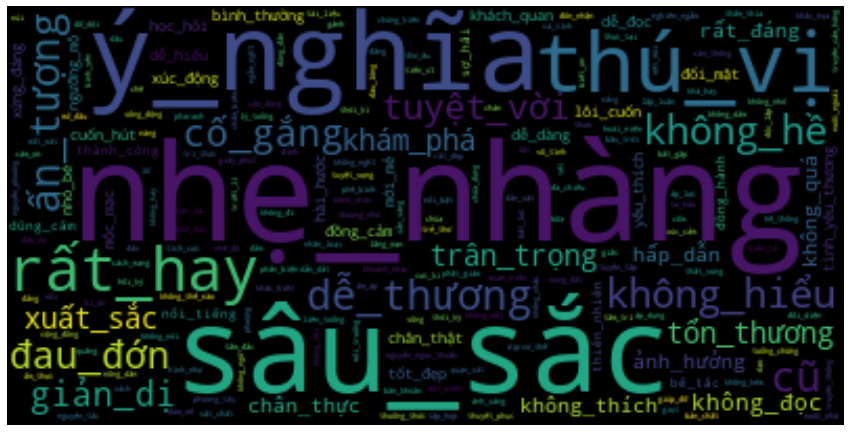

In [60]:
wc = WordCloud(
    background_color='black',stopwords = stopwords_lst)
wc.generate(remove_conjunctions(tich_cuc))
plt.figure(figsize=(15, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<span style = 'color : red'>**Tiêu cực**</span>

In [61]:
tieu_cuc = data_vn.loc[data_vn['evaluate'] == 'tiêu cực'].text_clean
tieu_cuc = ' '.join(tieu_cuc)

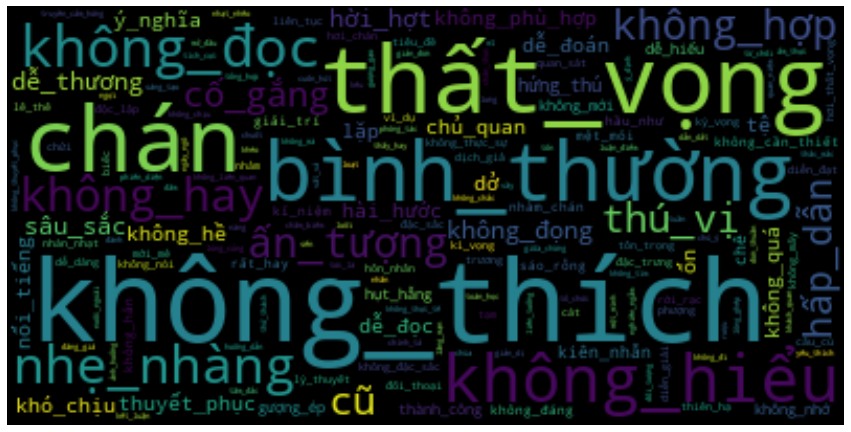

In [62]:
wc = WordCloud(
    background_color='black',stopwords = stopwords_lst)
wc.generate(remove_conjunctions(tieu_cuc))
plt.figure(figsize=(15, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<span style = 'color : red'>**Bình thường**</span>

In [63]:
binh_thuong = data_vn.loc[data_vn['evaluate'] == 'trung tính'].text_clean
binh_thuong = ' '.join(binh_thuong)

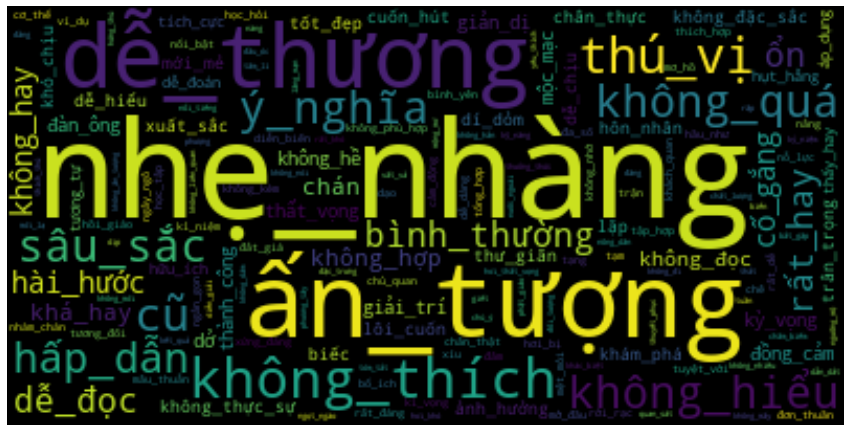

In [64]:
wc = WordCloud(
    background_color='black',stopwords = stopwords_lst)
wc.generate(remove_conjunctions(binh_thuong))
plt.figure(figsize=(15, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
data_vn.shape

(7426, 5)

In [66]:
for i in range(data_vn.shape[0]):
    if len(data_vn.text_clean[i])== 0:
        data_vn = data_vn.drop(i)

In [67]:
data_vn = data_vn.reset_index().drop(columns=['index'])
data_vn.shape

(7400, 5)

<span style = 'color : red; font-size : 35px'>**Xây dựng model**</span>

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import feature_selection
from sklearn.model_selection import train_test_split

In [69]:
tf = TfidfVectorizer(stop_words = stopwords_lst, min_df = 5, max_features =3000)
tf_transformed = tf.fit_transform(data_vn['text_clean'])
tf_data = pd.DataFrame(tf_transformed.toarray(), columns = tf.get_feature_names())
data_new = pd.concat([tf_data, data_vn[['evaluate']]], axis = 1)

In [70]:
data_new['evaluate'] = data_new['evaluate'].map(lambda x: 0  if x == 'tích cực'  else (1 if x == 'trung tính' else 2)) 

In [71]:
X = data_new.drop(columns = ['evaluate'])
Y = data_new['evaluate']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 41)

In [73]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.metrics import accuracy_score
import math
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [74]:
# # Choose k for KNN
# list_k = []
# list_acc = []

# for K_value in range(2, 11):

#     list_k.append(K_value)
#     neigh = KNeighborsClassifier(n_neighbors = K_value)
#     neigh.fit(X_train, Y_train)
#     Y_pred = neigh.predict(X_test)
#     acc = accuracy_score(Y_test, Y_pred)*100
#     train_knn = neigh.score(X_train, Y_train)
#     test_knn = neigh.score(X_test, Y_test)
    
#     list_acc.append(acc)
#     print('Accuracy is', accuracy_score(Y_test, Y_pred)*100, "% for K-Value", K_value)
#     print('Difference train vs test: ', abs(train_knn-test_knn),'\n')

# vi_tri = list_acc.index(max(list_acc))
# k = list_k[vi_tri]

In [75]:
# def model_comparison(x_train, x_test, y_train, y_test):
#     models = [LogisticRegression(),
#              MultinomialNB(),
#              SVC(kernel = 'linear'),
#              LinearSVC(),
#              KNeighborsClassifier(n_neighbors = 2), 
#              RandomForestClassifier(n_estimators=100),
#              DecisionTreeClassifier(),
#              SGDClassifier(),
#              AdaBoostClassifier(),
#              XGBClassifier()
#              ]

#     CV = 10
#     entries = []
#     i=0
#     for model in models:
#         scores_train = []
#         scores_test = []
#         acc_scores = []
#         times = []
#         abs_scores = []
#         for j in range(CV):
#             t1 = datetime.datetime.now()
#             model_name = model.__class__.__name__
#             model.fit(X_train,Y_train)
#             t2 = datetime.datetime.now()    
#             d = round((t2 - t1).microseconds/1000,1) # => miliseconds
#             score_train = model.score(x_train,y_train)
#             score_test = model.score(x_test,y_test)
#             Y_pred = model.predict(x_test)
#             abs_score = abs(score_train - score_test)
#             acc_score = accuracy_score(Y_pred, y_test)

#             scores_train.append(score_train)          
#             scores_test.append(score_test)
#             acc_scores.append(acc_score)
#             abs_scores.append(abs_score)
#             times.append(d) 

#         entries.append([model_name, np.array(scores_train).mean(), 
#                         np.array(scores_test).mean(), np.array(acc_scores).mean(), np.array(abs_scores).mean(), 
#                         np.array(times).mean()])
#         i += 1
#     cv_df = pd.DataFrame(entries, 
#                          columns=['model_name', 'score_train_mean', 
#                                   'score_test_mean', 'acc_score_mean','abs|score|', 'time_mean'])
#     return cv_df

 - Em chọn LogisticRegression do nó cho ra kết quả tốt nhất, thời gian cũng không quá lâu

In [76]:
# model_comparison(X_train, X_test, Y_train, Y_test)

**Nhận xét**: 
 - MultinomialNB là ổn nhất. Độ chênh lệch giữa train là test là gần 9%, thời gian chạy thì là thấp nhất. Độ chính xác chỉ thua LogisticRegression, tuy vậy kết quả vẫn còn thấp. Chưa sử dụng được

In [77]:
# model = LogisticRegression()
# model.fit(X_train, Y_train)

In [78]:
# Y_pred = model.predict(X_test)

In [79]:
# acc = accuracy_score(Y_pred, Y_test)
# acc

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
# classes = np.unique(Y_test)
# Y_test_array = pd.get_dummies(Y_test, drop_first=False).values
    
# ## Accuracy, Precision, Recall
# accuracy = accuracy_score(Y_test,Y_pred)
# # auc = roc_auc_score(Y_test, predicted_prob, 
# #                             multi_class="ovr")
# print("Accuracy:",  round(accuracy,2))
# # print("Auc:", round(auc,2))
# print("Detail:")
# print(classification_report(Y_test, Y_pred))
    
# ## Plot confusion matrix
# cm = confusion_matrix(Y_test, Y_pred)
# fig, ax = plt.subplots()
# sb.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
#             cbar=False)
# ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
#        yticklabels=classes, title="Confusion matrix")
# plt.yticks(rotation=0)
# plt.show()

**Nhận xét**: 
 - Nhìn vào confusion matrix em thấy model bị lệch đi nhiều, khi số Positive dự đoán đúng rất cao. 
 - Số lượng Neutral và Negative được đoán đúng thấp, số lượng bị đoán nhầm rất nhiều. Độ chính xác thấp

## Oversampling

In [82]:
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline

In [83]:
# smote = SMOTE()
# X_S_train, Y_S_train = smote.fit_resample(X_train, Y_train)
# print(sorted(Counter(Y_S_train).items()))

In [84]:
# model_comparison(X_S_train, X_test, Y_S_train, Y_test)

**Nhận xét**:
 - Sau khi cân bằng mẫu thì em cũng tạo ra một bảng so sánh của các model sau 10 lần chạy thì em thấy LogisticRegression có độ chính xác cao nhất thời gian chạy cũng chỉ chậm hơn Multinomial và KNN. Dù độ chênh lệch giữa train và test là gần 12%. Nhưng do độ chính xác là lớn nhất nên em sẽ sử dụng Logistic Regression để xây dựng mô hình Semi-Supervised Learning

In [85]:
# # model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1)
# model1 = LogisticRegression()
# model1.fit(X_S_train, Y_S_train)

In [86]:
# Y_pred_1 = model1.predict(X_test)

In [87]:
# classes = np.unique(Y_test)
# Y_test_array = pd.get_dummies(Y_test, drop_first=False).values
    
# ## Accuracy, Precision, Recall
# accuracy = accuracy_score(Y_test,Y_pred_1)
# # auc = roc_auc_score(Y_test, predicted_prob, 
# #                             multi_class="ovr")
# print("Accuracy:",  round(accuracy,2))
# # print("Auc:", round(auc,2))
# print("Detail:")
# print(classification_report(Y_test, Y_pred_1))
    
# ## Plot confusion matrix
# cm = confusion_matrix(Y_test, Y_pred_1)
# fig, ax = plt.subplots()
# sb.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
#             cbar=False)
# ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
#        yticklabels=classes, title="Confusion matrix")
# plt.yticks(rotation=0)
# plt.show()

**Nhận xét**:
 - Sau khi sử dụng oversampling thì số lượng dự đoán lệch về Positive đã giảm đi nhiều. Số lượng dự đoán đúng Neutral và Negative cũng tăng lên, tuy nhiên vẫn có bị đoán nhầm nhiều. Độ chính xác vẫn thấp

Em sử dụng Hyper-parameterđể chọn ra mô hình Logistic với tham số tốt nhất để áp dụng vào Semi-Supervised Learning

## Tuning Hyper-parameter

In [88]:
# from sklearn.model_selection import GridSearchCV, KFold

# logistic_param =  {
#     'C': [0.001, 0.01, 0.1, 1],
#     'penalty': ['l1', 'l2'],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'multi_class': ['multinomial', 'ovg']
# }
# kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [89]:
# best_dataset = [('data tf-idf over-sampling', (X_S_train, X_test, Y_S_train, Y_test))]
# best_model = [('Logistic Regression', LogisticRegression())]

In [90]:
# grid_model_list = []
# for model_name, model in best_model:
#     model_grid_cv = GridSearchCV(model,logistic_param,cv = kfold)
#     grid_model_list.append([model_name,model_grid_cv])

In [91]:
# best_model_list = []
# for data_name, data in best_dataset:
#     X_S_train,X_test,Y_S_train,Y_test = data
#     for model_name,model in grid_model_list:
#         model.fit(X_train,Y_train)
#         best_model_list.append([data_name.split()[1] + '_' + model_name + '_model',model.best_estimator_])

In [92]:
# result_df_best = []
# for dataset in best_dataset:
#     result = run_model(dataset,best_model_list,5)
#     result_df_best.append(result)

# trial_result = [item for sublist in result_df_best for item in sublist]

In [93]:
# best_model_list

<div class="alert alert-block alert-info">
<center><span style = 'color : blue; font-size : 25px'>Semi-Supervised Learning</span></center>
</div>

In [126]:
from numpy import concatenate
from sklearn.semi_supervised import LabelPropagation
from numpy import concatenate
from sklearn.feature_extraction.text import TfidfTransformer

import os
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score

In [127]:
# tạo dataframe mới từ data_vn
df1 = data_vn[['text_clean','evaluate']]
df1['evaluate'] = df1['evaluate'].map(lambda x: 0  if x == 'tích cực'  else (1 if x == 'trung tính' else 2)) 

In [128]:
X = df1.drop(columns = ['evaluate'])
Y = df1.evaluate

In [129]:
X.head()

,text_clean
0,đòi_hỏi phiêu_lưu loài tuyệt_vời nhưng lỗi_lầm...
1,phiêu_lưu chúa nhẫn vẻ đẹp không_nằm chỗ thể_h...
2,có_lẽ đọc muộn
3,ghét ghét ghét đắng nhưng đọc cố đọc kiểu thấy...
4,đọc thích ấn_tượng đoạn bài_học đường đời họa ...


In [130]:
# Chia train,test ngẫu nhiên. Với test = 0.8, train = 0.2
X_train_lab, X_test_unlab, Y_train_lab, Y_test_unlab = train_test_split(X, Y, test_size=0.9, random_state=42)

In [131]:
X_train_lab.head()

,text_clean
2993,đợi kết_cục rõ_ràng câu_chuyện thiều tường mận...
5512,xứ ả rập rất_thích_thú ả rập xứ_sở kỳ_lạ xứ n...
6313,hài_hước đặc_trưng nhưng đặc_trưng sự_hóa nhân...
1191,thời_đại không_đánh_giá sách
5772,tối lỡ_miệng nhấp ngụm cà_phê không_ngủ cười s...


In [132]:
Y_train_lab.head()

2993    1
5512    1
6313    1
1191    1
5772    1
Name: evaluate, dtype: int64

In [133]:
# Tạo 'không có nhãn' từ Y_test_unlab
nolabel = [-1 for _ in range(len(Y_test_unlab))]       # ko có nhãn được gán là -1

In [134]:
# Tạo bộ dataframe có nhãn (0,1,2)
df_label = X_train_lab
df_label['evaluate'] = Y_train_lab

In [135]:
# Tạo bộ dataframe ko có nhãn (-1)

df_nolabel = X_test_unlab
df_nolabel['evaluate'] = nolabel

In [136]:
df_final = pd.concat([df_label, df_nolabel])
df_final = df_final.reset_index().drop(columns = ['index'])

In [137]:
df_final.head()

,text_clean,evaluate
0,đợi kết_cục rõ_ràng câu_chuyện thiều tường mận...,1
1,xứ ả rập rất_thích_thú ả rập xứ_sở kỳ_lạ xứ n...,1
2,hài_hước đặc_trưng nhưng đặc_trưng sự_hóa nhân...,1
3,thời_đại không_đánh_giá sách,1
4,tối lỡ_miệng nhấp ngụm cà_phê không_ngủ cười s...,1


In [138]:
df_final.tail()

,text_clean,evaluate
7395,cố hết_sức nhưng đọc nửa miêu_tả sách dựng bản...,-1
7396,cúi không_bít,-1
7397,tác_phẩm cà_khịa tác_phẩm giúp vững_chắc chân_...,-1
7398,đọc thương_nhớ mười tiểu_sử cuộc_sống bắc thời...,-1
7399,phản_ứng bản_chất xã_hội hiện hồ thái tổng_thể...,-1


In [139]:
# Parameters
vectorizer_params = dict(ngram_range=(1, 2), min_df=5, max_df=0.8)
logistic_params = dict(multi_class='multinomial', C=1, solver='saga', penalty='l1')
SMOTE(random_state=42)
# Supervised Pipeline
pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        ("clf", LogisticRegression(**logistic_params))
    ]
)
# SelfTraining Pipeline
st_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        ("clf", SelfTrainingClassifier(LogisticRegression(**logistic_params), verbose=True))
    ]
)
# LabelSpreading Pipeline
ls_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        # LabelSpreading does not support dense matrices
        ("todense", FunctionTransformer(lambda x: x.todense())),
        ("clf", LabelSpreading())
    ]
)


In [140]:
def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        "Micro-averaged F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="micro")
    )
    print("-" * 10)
    print()


In [141]:
df_train = df_final[df_final.evaluate >= 0]
df_test = df_final[df_final.evaluate < 0]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(df_train['text_clean'], df_train['evaluate'])

In [143]:
print("Supervised LogisticRegression on 20% of the training data:")
eval_and_print_metrics(pipeline, X_train, Y_train, X_test, Y_test)

# set the non-masked subset to be unlabeled
print("SelfTrainingClassifier on 20% of the training data (rest is unlabeled):")
eval_and_print_metrics(st_pipeline, X_train, Y_train, X_test, Y_test)

if "CI" not in os.environ:
    # LabelSpreading takes too long to run in the online documentation
    print("LabelSpreading on 20% of the data (rest is unlabeled):")
    eval_and_print_metrics(ls_pipeline, X_train, Y_train, X_test, Y_test)

Supervised LogisticRegression on 20% of the training data:
Number of training samples: 555
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.492
----------

SelfTrainingClassifier on 20% of the training data (rest is unlabeled):
Number of training samples: 555
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.470
----------

LabelSpreading on 20% of the data (rest is unlabeled):
Number of training samples: 555
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.205
----------



In [144]:
model = st_pipeline.fit(X_train, Y_train)
Y_pred = model.predict(df_test['text_clean'])

In [145]:
df_test['evaluate'] = Y_pred

In [146]:
df_test.to_excel('labeled_data_from_model.xlsx', index=False)

In [147]:
df_new = df_train.append(df_test[['text_clean', 'evaluate']])
df_new.head()

,text_clean,evaluate
0,đợi kết_cục rõ_ràng câu_chuyện thiều tường mận...,1
1,xứ ả rập rất_thích_thú ả rập xứ_sở kỳ_lạ xứ n...,1
2,hài_hước đặc_trưng nhưng đặc_trưng sự_hóa nhân...,1
3,thời_đại không_đánh_giá sách,1
4,tối lỡ_miệng nhấp ngụm cà_phê không_ngủ cười s...,1


In [148]:
for i in range(df_new.shape[0]):
    for con in conjunctions:
        if ('rất_hay' in df_new.text_clean[i] or 'hay_quá' in df_new.text_clean[i] or 'quá_hay' in df_new.text_clean[i]\
        or 'hay_cực' in df_new.text_clean[i] or 'cực_hay' in df_new.text_clean[i] or 'hay_lắm' in df_new.text_clean[i]\
        or 'hay_ghê' in df_new.text_clean[i]  or 'siêu_hay' in df_new.text_clean[i] or 'lôi_cuốn' in df_new.text_clean[i]
        or 'hấp_dẫn' in df_new.text_clean[i]) and con not in df_new.text_clean[i]:
            df_new['evaluate'][i] = 0
        
        elif ('không_cuốn_hút' in df_new.text_clean[i] or 'không_hay' in df_new.text_clean[i] or 'không_hấp_dẫn' in df_new.text_clean[i]\
        or 'không_thú_vị' in df_new.text_clean[i] or 'không_ấn_tượng' in df_new.text_clean[i] or 'chán' in df_new.text_clean[i]\
              or 'rất chán' in df_new.text_clean[i] or 'rất tệ' in df_new.text_clean[i]) and con not in df_new.text_clean[i]:
            df_new['evaluate'][i] = 2
        
        else:
            continue

In [149]:
# Tạo lại train test split từ datafame mới là df_new
X_train, X_test, Y_train, Y_test = train_test_split(df_new['text_clean'], df_new['evaluate'], test_size=0.2)

In [150]:
df_new.head()

,text_clean,evaluate
0,đợi kết_cục rõ_ràng câu_chuyện thiều tường mận...,1
1,xứ ả rập rất_thích_thú ả rập xứ_sở kỳ_lạ xứ n...,2
2,hài_hước đặc_trưng nhưng đặc_trưng sự_hóa nhân...,1
3,thời_đại không_đánh_giá sách,1
4,tối lỡ_miệng nhấp ngụm cà_phê không_ngủ cười s...,1


In [151]:
print("Supervised LogisticRegressor")
eval_and_print_metrics(pipeline, X_train, Y_train, X_test, Y_test)

Supervised LogisticRegressor
Number of training samples: 5920
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.873
----------



In [152]:
model_new = pipeline.fit(X_train, Y_train)
Y_pred = model_new.predict(X_test)
print(
    "Micro-averaged F1 score on test set: %0.3f"
    % f1_score(Y_test, Y_pred, average="micro")
)

Micro-averaged F1 score on test set: 0.879


In [153]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))
print('Classification report: \n', classification_report(Y_test, Y_pred))

Confusion matrix: 
 [[736  48  25]
 [ 30 332  21]
 [ 27  28 233]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       809
           1       0.81      0.87      0.84       383
           2       0.84      0.81      0.82       288

    accuracy                           0.88      1480
   macro avg       0.86      0.86      0.86      1480
weighted avg       0.88      0.88      0.88      1480



Accuracy: 0.88
Detail:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       809
           1       0.81      0.87      0.84       383
           2       0.84      0.81      0.82       288

    accuracy                           0.88      1480
   macro avg       0.86      0.86      0.86      1480
weighted avg       0.88      0.88      0.88      1480



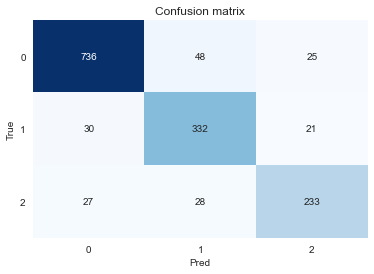

In [154]:
classes = np.unique(Y_test)
Y_test_array = pd.get_dummies(Y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(Y_test,Y_pred)
# auc = roc_auc_score(Y_test, predicted_prob, 
#                             multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(Y_test, Y_pred))
    
## Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots()
sb.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

**Nhận xét**:
   - Nhìn vào confusion matrix ta thấy mức độ dự đoán đúng Postive có số lượng dự đoán đúng cao nhất 
   - Số lượng Neutral và Negative được dự đoán đúng cũng đã được tăng lên đáng kể và giảm đi được số lượng bị đoán nhầm

<span style = 'color : blue; font-size:30px'>**Thử 1 vài bình luận bên ngoài bộ dataset**</span>

In [155]:
text_new = pd.Series(['một cuốn sách nhẹ nhàng dễ đọc hãy cỗ gắng để tận dụng thời gian vào những niềm đam mê',
                      'tác phẩm rất hay','''Vốn là tác phẩm dẫn dắt mình đến với Tử Kim Trần cùng câu khẩu hiệu bất hủ “Giết đủ 15 giám đốc, giám đốc không đủ, trưởng phòng bù.”, nhưng mình lại mua “Mưu sát” sau cả “Đứa trẻ hư” và “Đêm trường tăm tối”.
Đầu tiên và trên hết, một lần nữa, Tử Kim Trần dùng “định luật bảo toàn” với phong cách văn chương của mình. Anh luôn đặt lối thoát hiểm cho thủ phạm ngay từ đầu truyện, nhưng chỉ đến khi đọc xong cái kết ta mới ngộ ra. Ở điểm này, “Mưu sát” đã làm rất tốt, dù chưa bằng “Đứa trẻ hư".
Đọc nhiều truyện của Tử Kim Trần, sẽ thấy anh Trần rất mẫn cảm với sự hủ bại của bọn quan chức cơ quan pháp quyền, đặc biệt ở các khu vực quận huyện xa xôi lạc hậu. Điển hình với câu mỉa mai “Chỉ cần vào trong Sở công an, muốn có khẩu cung gì thì sẽ có khẩu cung đó!”. Không hiểu sao tác phẩm của anh vẫn vượt qua vòng kiểm duyệt của Trung Quốc !?
“Mưu sát” đậm đà hơn về thủ pháp gây án so với “Đứa trẻ hư” nhưng động cơ thì có thể nói là dùng dao mổ lợn giết kẻ mổ lợn. Nếu như đứng dưới góc độ một người mê trinh thám, cuốn này xứng đáng được 8 điểm. Nhưng khi đọc dưới góc độ là một con người, thì lí lẽ của “Mưu sát” chưa đủ thuyết phục để nhập với thể loại giết người đếm xác này. Nên chỉ đáng được 5 điểm.
Tựu trung lại “Mưu sát” được 6.5/10. Mua về với mục đích sưu tầm đủ bộ của bác Tử Kim Trần mà thôi. Chưa kể bìa cũ trông “táo bón” quá!''',
                    'Càng về sau càng đuối, mô-típ cũ, văn phong không cuốn hút', 
                     'tác phẩm đọc thấy chán và rất tệ'])

for text_1 in text_new:
    text_2 = replace_word(pd.Series(text_1))
    text_2 = process_text(text_2.values[0] , emoji_dict, teen_dict, wrong_lst)
    text_2 = convert_unicode(text_2)
    text_2 = process_postag_thesea(text_2)
    text_2 = remove_stopword(text_2, stopwords_lst)
    text_2 = replace_word2(pd.Series(text_2))
    yhat = model_new.predict(text_2)
#     proba = model_new.predict_proba(text_2)
    if yhat== 0:
        label = "positive"
    elif yhat== 1:
        label = "neutral"
    else:
        label = "negative"
    print(text_1,"-", label, '\n')
#     print(proba, '\n')

một cuốn sách nhẹ nhàng dễ đọc hãy cỗ gắng để tận dụng thời gian vào những niềm đam mê - neutral 

tác phẩm rất hay - positive 

Vốn là tác phẩm dẫn dắt mình đến với Tử Kim Trần cùng câu khẩu hiệu bất hủ “Giết đủ 15 giám đốc, giám đốc không đủ, trưởng phòng bù.”, nhưng mình lại mua “Mưu sát” sau cả “Đứa trẻ hư” và “Đêm trường tăm tối”.
Đầu tiên và trên hết, một lần nữa, Tử Kim Trần dùng “định luật bảo toàn” với phong cách văn chương của mình. Anh luôn đặt lối thoát hiểm cho thủ phạm ngay từ đầu truyện, nhưng chỉ đến khi đọc xong cái kết ta mới ngộ ra. Ở điểm này, “Mưu sát” đã làm rất tốt, dù chưa bằng “Đứa trẻ hư".
Đọc nhiều truyện của Tử Kim Trần, sẽ thấy anh Trần rất mẫn cảm với sự hủ bại của bọn quan chức cơ quan pháp quyền, đặc biệt ở các khu vực quận huyện xa xôi lạc hậu. Điển hình với câu mỉa mai “Chỉ cần vào trong Sở công an, muốn có khẩu cung gì thì sẽ có khẩu cung đó!”. Không hiểu sao tác phẩm của anh vẫn vượt qua vòng kiểm duyệt của Trung Quốc !?
“Mưu sát” đậm đà hơn về thủ p